In [1]:
using Pkg
pkg"activate ."

In [2]:
import StaticArrays: SVector
using RegionTrees

In [3]:
include("adaptive_distance_fields.jl")
using .AdaptivelySampledDistanceFields: ASDF, evaluate

In [4]:
s = x -> sqrt(sum((x - SVector(0, 0)).^2))
adf = ASDF(s, SVector(-1., -1), SVector(2., 2))

Cell: HyperRectangle{2,Float64}([-1.0, -1.0], [2.0, 2.0])

In [5]:
using Plots

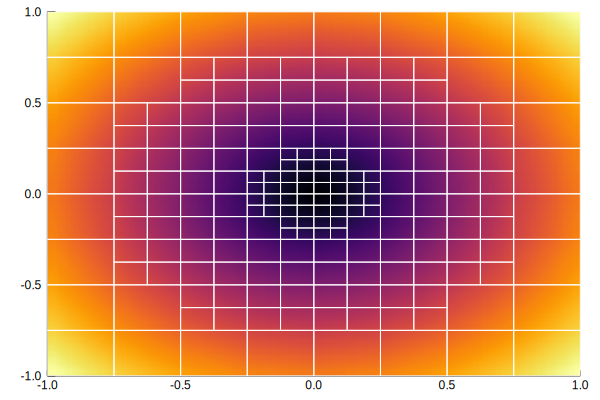

In [6]:
plt = plot(xlim=(-1, 1), ylim=(-1, 1), legend=nothing)

x = range(-1, stop=1, length=50)
y = range(-1, stop=1, length=50)
contour!(plt, x, y, (x, y) -> evaluate(adf, SVector(x, y)), fill=true)

for leaf in allleaves(adf)
    v = hcat(collect(vertices(leaf.boundary))...)
    plot!(plt, v[1,[1,2,4,3,1]], v[2,[1,2,4,3,1]], color=:white)
end


plt